In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_theme(style="whitegrid")
sns.color_palette("rocket", as_cmap=True)
sns.set_palette("pastel")
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [37]:
data_dir = "../data/"
plots_dir = "../plots/"

In [116]:
reviews = pd.read_csv(data_dir+"reviews.csv")
reviews.drop("Unnamed: 0", inplace=True, axis=1)

In [117]:
reviews["game_name"]=reviews.game_name.str.split("       ",expand=True,)[0]
reviews.head()

,game_id,game_name,score,author,date,summary
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis..."
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...


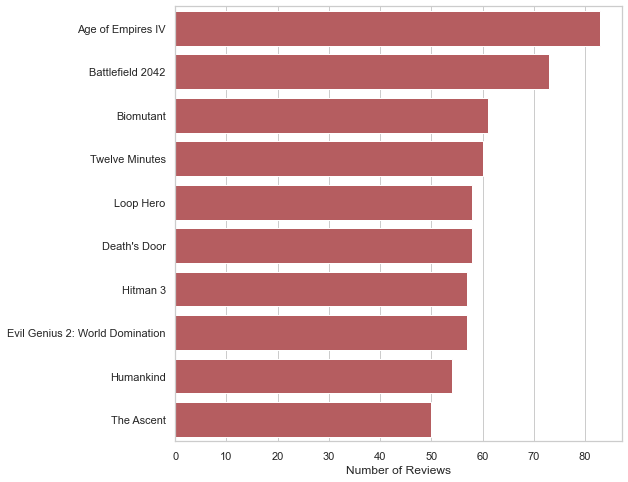

In [118]:
#number of reviews for games
data = pd.DataFrame(reviews.game_name.value_counts()[:10])
data.reset_index(inplace=True)
sns.barplot(x="game_name", y="index", data=data, color="r")
plt.xlabel("Number of Reviews")
plt.ylabel("");

In [119]:
stop_words=set(stopwords.words("english"))

#tokenised list of reviews that do not contain stop words
def tokenized_summary(x):
    filtered_sent=[]
    for w in word_tokenize(x):
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent

reviews["tokenised"] = reviews['summary'].apply(lambda x: tokenized_summary(x))

In [162]:
#Lemmatization 
import string
lem = WordNetLemmatizer()
def lemmatized_list(x):
    lemmatized=[]
    for w in x:
        lemmatized.append(lem.lemmatize(w))
    return " ".join(lemmatized)

reviews["lemmatized"] = reviews['tokenised'].apply(lambda x: lemmatized_list(x))


In [163]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ....,positive,0.9161
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...","Enhanced fantastic fresh content , Disco Elysi...",positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium : The Final Cut n't shy away pro...,positive,0.5571


In [153]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

def vader_sentiment(x):
    sentiment_dict = sid_obj.polarity_scores(x)
    if sentiment_dict['compound'] > 0.05:
        return pd.Series(['positive', sentiment_dict['compound']])
    elif sentiment_dict['compound'] <= -0.05:
        return pd.Series(['negative', sentiment_dict['compound']])
    else:
        return pd.Series(['neutral',sentiment_dict['compound']])

reviews[["sentiment_label", 'sentiment_value']] = reviews['lemmatized'].apply(lambda x: vader_sentiment(x))


In [154]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare I...,positive,0.9161
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysium...,positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut n't shy away probl...,positive,0.5571


In [155]:
sentiments_group = reviews.groupby(by=['game_name'])['sentiment_value'].agg('mean').reset_index()
sentiments_group.columns = ['game_name', 'average_sentiment']


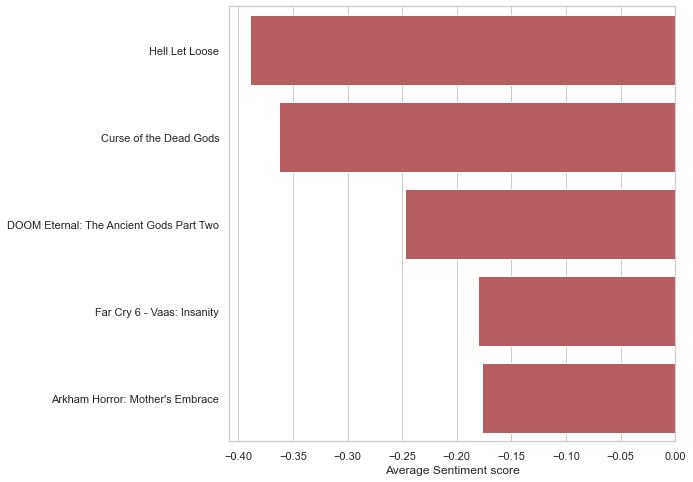

In [156]:
#Top 5 negative sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[:5]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="r")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

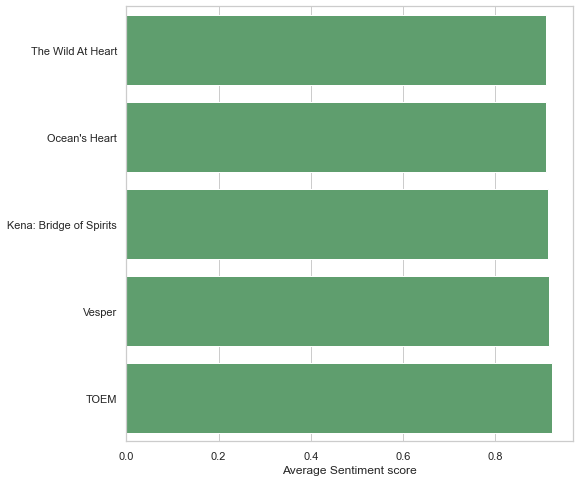

In [157]:
#Top 5 Positive sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[-5:]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="g")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

TOEM reviews has the highest average positive sentiment whereas Hell let loose game has the worst average sentiment score

## TF-IDF

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, min_df=10)
vectors = vectorizer.fit_transform(reviews['lemmatized'])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tfidf = pd.DataFrame(denselist, columns=feature_names)

In [167]:
column_names = tfidf.columns
column_names

Index([''d', ''ll', ''m', ''re', ''s', ''ve', '--', '...', '04/2021',
       '05/2021',
       ...
       'zero', 'zombie', 'zombies', 'zone', '–', '—', '‘', '’', '“', '”'],
      dtype='object', length=2684)

In [169]:
column =[]
for w in column_names:
    if w not in string.punctuation:
        column.append(w)

In [170]:
column

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '--',
 '...',
 '04/2021',
 '05/2021',
 '06/2021',
 '08/2021',
 '09/2021',
 '1',
 '10',
 '10/2021',
 '100',
 '101',
 '11/2021',
 '12',
 '12/2021',
 '15',
 '16',
 '16-bit',
 '2',
 '20',
 '2021',
 '2022',
 '2042',
 '2d',
 '3',
 '30',
 '360',
 '3d',
 '4',
 '40,000',
 '40k',
 '47',
 '4x',
 '5',
 '6',
 '60',
 '7',
 '8',
 '80',
 '90',
 '96',
 '``',
 'a',
 'aaa',
 'ability',
 'able',
 'absence',
 'absolute',
 'absolutely',
 'absurd',
 'abundance',
 'academia',
 'access',
 'accessibility',
 'accessible',
 'accompanied',
 'accomplished',
 'accomplishment',
 'ace',
 'achieve',
 'achievement',
 'achieves',
 'acid',
 'across',
 'act',
 'acting',
 'action',
 'action-adventure',
 'action-packed',
 'action-rpg',
 'activity',
 'actual',
 'actually',
 'adaptation',
 'add',
 'added',
 'addicting',
 'addictive',
 'adding',
 'addition',
 'additional',
 'address',
 'adjustment',
 'admittedly',
 'adorable',
 'advance',
 'advantage',
 'adventure',
 'aesthetic',
 '